In [1]:
import pandas as pd 
data = pd.read_csv(r"C:\Users\rochi\OneDrive\Desktop\cancer\step1_cleanCancer.csv")

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
print(data['6th Stage'].value_counts(normalize=True) * 100)

6th Stage
IIA     32.430417
IIB     28.081511
IIIA    26.093439
IIIC    11.729622
IIIB     1.665010
Name: proportion, dtype: float64


In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

X = data.drop(columns=['6th Stage']) 
y = data['6th Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.dtypes)
print(y_train.dtypes)


Age                       object
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object
object


In [8]:
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', 'differentiate',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', 'differentiate',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [11]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

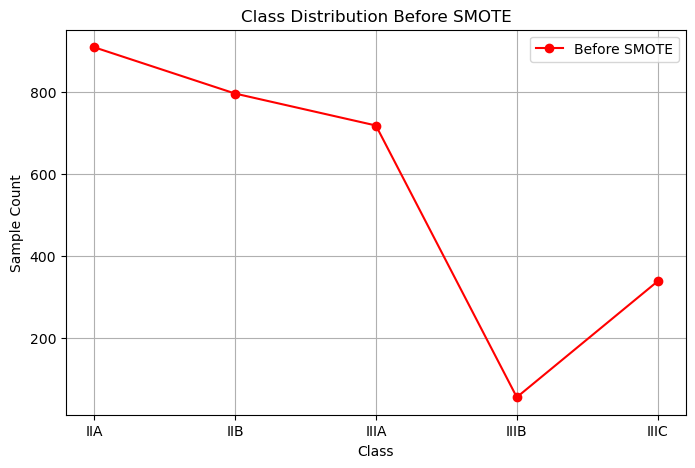

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

class_counts_before = Counter(y_train)
classes_before = sorted(class_counts_before.keys())
counts_before = [class_counts_before[cls] for cls in classes_before]

plt.figure(figsize=(8, 5))
plt.plot(classes_before, counts_before, marker='o', linestyle='-', color='red', label='Before SMOTE')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.grid(True)
plt.legend()
plt.show()


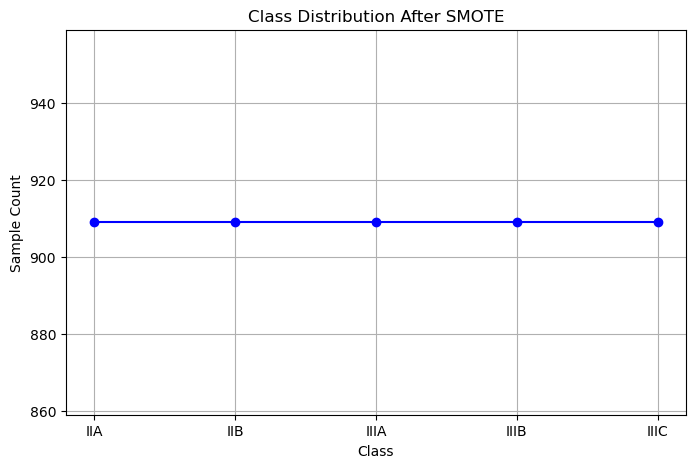

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

class_counts = Counter(y_resampled)

classes = sorted(class_counts.keys())
counts = [class_counts[cls] for cls in classes]

plt.figure(figsize=(8, 5))
plt.plot(classes, counts, marker='o', linestyle='-', color='blue')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.grid(True)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print("Test Accuracy after SMOTE:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy after SMOTE: 1.0
Confusion Matrix:
 [[396   0   0   0   0]
 [  0 334   0   0   0]
 [  0   0 332   0   0]
 [  0   0   0  12   0]
 [  0   0   0   0 134]]
Classification Report:
               precision    recall  f1-score   support

         IIA       1.00      1.00      1.00       396
         IIB       1.00      1.00      1.00       334
        IIIA       1.00      1.00      1.00       332
        IIIB       1.00      1.00      1.00        12
        IIIC       1.00      1.00      1.00       134

    accuracy                           1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208



Logistic Regression

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def convert_age_range(age_str):
    if isinstance(age_str, str) and '-' in age_str:
        start, end = map(int, age_str.split('-'))
        return (start + end) / 2
    return np.nan

data['Age'] = data['Age'].apply(convert_age_range)

x = data[['Age', 'Tumor Size']]
y = data['Advanced Stage']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns = x.columns

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

val_accuracies = []
test_accuracies = []

for i in range(5):
    
    x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=i)
    
    model = LogisticRegression()
    model.fit(x_train, y_train)
    
    y_val_pred = model.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    y_test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)
    
    print(f"Run {i+1}: Validation Accuracy = {val_acc:.4f}, Test Accuracy = {test_acc:.4f}")

print("\nAverage Validation Accuracy over 5 runs:", np.mean(val_accuracies))
print("Average Test Accuracy over 5 runs:", np.mean(test_accuracies))

print(f"\nClassification report for Run {i+1} (Validation):")
print(classification_report(y_val, y_val_pred))

print(f"Classification report for Run {i+1} (Test):")
print(classification_report(y_test, y_test_pred))


Run 1: Validation Accuracy = 0.8571, Test Accuracy = 0.8671
Run 2: Validation Accuracy = 0.8618, Test Accuracy = 0.8683
Run 3: Validation Accuracy = 0.8525, Test Accuracy = 0.8646
Run 4: Validation Accuracy = 0.8571, Test Accuracy = 0.8621
Run 5: Validation Accuracy = 0.8649, Test Accuracy = 0.8472

Average Validation Accuracy over 5 runs: 0.8586956521739131
Average Test Accuracy over 5 runs: 0.861863354037267

Classification report for Run 5 (Validation):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       557
           1       0.50      0.03      0.06        87

    accuracy                           0.86       644
   macro avg       0.68      0.51      0.50       644
weighted avg       0.82      0.86      0.81       644

Classification report for Run 5 (Test):
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       684
           1       0.33      0.02      0.03       121

    accu

C:\Users\rochi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


NAIVE BAYES

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

data['Advanced Stage'] = data['6th Stage'].apply(lambda x: 1 if x in ['IIIB', 'IIIC'] else 0)

x = data[['Age', 'Tumor Size']]
y = data['Advanced Stage']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns = x.columns

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)


val_accuracies = []
test_accuracies = []

for i in range(5):
    x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=i)

    model = GaussianNB()
    model.fit(x_train, y_train)

    y_val_pred = model.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    y_test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

    print(f"Run {i+1}: Validation Accuracy = {val_acc:.4f}, Test Accuracy = {test_acc:.4f}")

print("\nAverage Validation Accuracy (Naive Bayes):", np.mean(val_accuracies))
print("Average Test Accuracy (Naive Bayes):", np.mean(test_accuracies))


Run 1: Validation Accuracy = 0.8370, Test Accuracy = 0.8596
Run 2: Validation Accuracy = 0.8447, Test Accuracy = 0.8634
Run 3: Validation Accuracy = 0.8447, Test Accuracy = 0.8472
Run 4: Validation Accuracy = 0.8494, Test Accuracy = 0.8621
Run 5: Validation Accuracy = 0.8618, Test Accuracy = 0.8373

Average Validation Accuracy (Naive Bayes): 0.8475155279503106
Average Test Accuracy (Naive Bayes): 0.8539130434782608


Support Vector Machine

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

data['Advanced Stage'] = data['6th Stage'].apply(lambda x: 1 if x in ['IIIB', 'IIIC'] else 0)

x = data[['Age', 'Tumor Size']]
y = data['Advanced Stage']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns = x.columns

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

val_accuracies = []
test_accuracies = []

for i in range(5):
    x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=i)

    model = SVC(kernel='linear') 
    model.fit(x_train, y_train)

    y_val_pred = model.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    y_test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

    print(f"Run {i+1}: Validation Accuracy = {val_acc:.4f}, Test Accuracy = {test_acc:.4f}")

print("\nAverage Validation Accuracy (SVM):", np.mean(val_accuracies))
print("Average Test Accuracy (SVM):", np.mean(test_accuracies))


C:\Users\rochi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Run 1: Validation Accuracy = 0.8680, Test Accuracy = 0.8696
Run 2: Validation Accuracy = 0.8618, Test Accuracy = 0.8708
Run 3: Validation Accuracy = 0.8540, Test Accuracy = 0.8621
Run 4: Validation Accuracy = 0.8587, Test Accuracy = 0.8646
Run 5: Validation Accuracy = 0.8649, Test Accuracy = 0.8497

Average Validation Accuracy (SVM): 0.8614906832298137
Average Test Accuracy (SVM): 0.8633540372670808


Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

data['Advanced Stage'] = data['6th Stage'].apply(lambda x: 1 if x in ['IIIB', 'IIIC'] else 0)

x = data[['Age', 'Tumor Size']]
y = data['Advanced Stage']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns = x.columns

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

val_accuracies = []
test_accuracies = []

for i in range(5):
    x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=i)

    model = RandomForestClassifier(random_state=i)
    model.fit(x_train, y_train)

    y_val_pred = model.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    y_test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

    print(f"Run {i+1}: Validation Accuracy = {val_acc:.4f}, Test Accuracy = {test_acc:.4f}")

print("\nAverage Validation Accuracy (Random Forest):", np.mean(val_accuracies))
print("Average Test Accuracy (Random Forest):", np.mean(test_accuracies))

C:\Users\rochi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Run 1: Validation Accuracy = 0.8618, Test Accuracy = 0.8571
Run 2: Validation Accuracy = 0.8618, Test Accuracy = 0.8696
Run 3: Validation Accuracy = 0.8494, Test Accuracy = 0.8658
Run 4: Validation Accuracy = 0.8618, Test Accuracy = 0.8658
Run 5: Validation Accuracy = 0.8540, Test Accuracy = 0.8435

Average Validation Accuracy (Random Forest): 0.8577639751552795
Average Test Accuracy (Random Forest): 0.8603726708074534


In [31]:
np.count_nonzero(~np.isnan(x_train))

2575

Compairing accuracy

In [34]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Avg Val Accuracy': [0.85, 0.84, 0.86, 0.85],
    'Avg Test Accuracy': [0.86, 0.85, 0.86, 0.86]
})

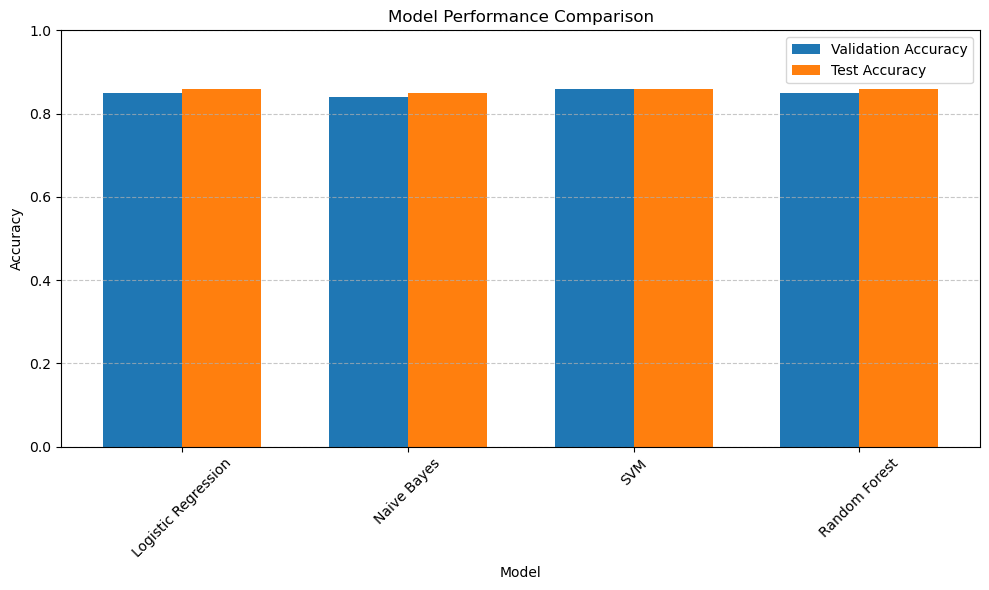

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(results_df))

val_bars = plt.bar(index, results_df['Avg Val Accuracy'], bar_width, label='Validation Accuracy')
test_bars = plt.bar([i + bar_width for i in index], results_df['Avg Test Accuracy'], bar_width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks([i + bar_width / 2 for i in index], results_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [38]:
import pandas as pd

results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Avg Validation Accuracy': [0.85, 0.84, 0.86, 0.85],
    'Avg Test Accuracy': [0.86, 0.85, 0.85, 0.86]
}

results_df = pd.DataFrame(results)

print(results_df.to_string(index=False))

              Model  Avg Validation Accuracy  Avg Test Accuracy
Logistic Regression                     0.85               0.86
        Naive Bayes                     0.84               0.85
                SVM                     0.86               0.85
      Random Forest                     0.85               0.86


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression().fit(x_train, y_train)
nb = GaussianNB().fit(x_train, y_train)
svm = SVC(probability=True).fit(x_train, y_train)
rf = RandomForestClassifier().fit(x_train, y_train)

models = {
    'Logistic Regression': logreg,
    'Naive Bayes': nb,
    'SVM': svm,
    'Random Forest': rf
}

In [42]:
from sklearn.preprocessing import LabelEncoder

le_stage = LabelEncoder()
data['6th Stage'] = le_stage.fit_transform(data['6th Stage'])

print(le_stage.classes_)

data['Survived_5_Years'] = (data['Survival Months'] > 60).astype(int)

features = ['Age', 'Tumor Size', '6th Stage']
X = data[features]

y = data['Survived_5_Years']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


['IIA' 'IIB' 'IIIA' 'IIIB' 'IIIC']
Accuracy: 0.69


In [44]:
import pickle
pickle.dump(rf, open('breast_cancer_model.pkl', 'wb'))

In [46]:
import pandas as pd
import joblib

joblib.dump(model, "breast_cancer_model.pkl")

model = joblib.load("breast_cancer_model.pkl")

input_data = pd.DataFrame([[37, 52.0, 4]], columns=['Age', 'Tumor Size', '6th Stage'])
prediction = model.predict(input_data)

result = "Survived > 5 years" if prediction[0] == 1 else "Did NOT survive > 5 years"
print(f"Prediction: {result}")

Prediction: Did NOT survive > 5 years
